# E-commerce Machine Learning


In [43]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Spark Session Initiate

In [2]:
spark = SparkSession.builder.master('local[6]')\
                            .appName('ecommerce')\
                            .getOrCreate()
spark

In [3]:
# spark.stop()

## Load Dataset
Source : [Pakistan E-commerce Dataset](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset/data)

In [4]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

In [5]:
# define dataframe schema
schema = StructType([
    StructField('item_id', IntegerType(), True),
    StructField('status', StringType(), True),
    StructField('created_at', StringType(), True),
    StructField('sku', StringType(), True),
    StructField('price', FloatType(), True),
    StructField('qty_ordered', IntegerType(), True),
    StructField('grand_total', FloatType(), True),
    StructField('increment_id', IntegerType(), True),
    StructField('category_name_1', StringType(), True),
    StructField('sales_commission_code', StringType(), True),
    StructField('discount_amount', FloatType(), True),
    StructField('payment_method', StringType(), True),
    StructField('working_date', StringType(), True),
    StructField('BI Status', StringType(), True),
    StructField(' MV', StringType(), True),
    StructField('Year', StringType(), True),
    StructField('Month', StringType(), True),
    StructField('Customer Since', StringType(), True),
    StructField('M-Y', StringType(), True),
    StructField('F-Y', StringType(), True),
    StructField('Customer ID', StringType(), True),
    # ignore last 5 column data because it's empty column
])

In [6]:
# tmp = pd.read_csv('./dataset/Pakistan Largest Ecommerce Dataset.csv')
# tmp.info()

In [7]:
df = spark.read.csv('./dataset/Pakistan Largest Ecommerce Dataset.csv', header=True, schema=schema)
df.printSchema()
df.show(5)

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- sku: string (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- increment_id: integer (nullable = true)
 |-- category_name_1: string (nullable = true)
 |-- sales_commission_code: string (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- working_date: string (nullable = true)
 |-- BI Status: string (nullable = true)
 |--  MV: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Customer Since: string (nullable = true)
 |-- M-Y: string (nullable = true)
 |-- F-Y: string (nullable = true)
 |-- Customer ID: string (nullable = true)

+-------+--------------+----------+--------------------+------+-----------+-----------+------------+-----------------+----------

In [8]:
df.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,584524.0,NaN,NaN,NaN,565667.074218,200121.173648,211131.0,395000.75,568424.5,739106.25,905208.0
status,584520,19,complete,233685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,584535,790,11/25/2016,15169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku,584515,84897,MATSAM59DB75ADB2F80,3775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,584524.0,NaN,NaN,NaN,8236.0625,435291.6875,0.0,360.0,899.0,4070.0,100348152.0
qty_ordered,584513.0,NaN,NaN,NaN,1.296394,3.996098,1.0,1.0,1.0,1.0,1000.0
grand_total,584513.0,NaN,NaN,NaN,8530.706055,61321.390625,-1594.0,945.0,1960.199951,6999.0,17888000.0
increment_id,584512.0,NaN,NaN,NaN,100355601.703919,388757.583304,0.0,100264561.75,100351163.5,100450243.25,100562387.0
category_name_1,584360,18,Mobiles & Tablets,115710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_commission_code,447353,7236,\N,338990,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('shape of df:', (df.count(), len(df.columns)))

shape of df: (1048586, 21)


In [10]:
# df.toPandas().info()

## Preprocessing Data

In [11]:
import pyspark.sql.functions as F

### Drop Unused Columns

In [12]:
df = df.drop('working_date','sales_commission_code',' MV','F-Y','M-Y','Year','Month','increment_id','sku')
print('shape of df:', (df.count(), len(df.columns)))

shape of df: (1048586, 12)


### Rename Columns

In [13]:
df = df.withColumnsRenamed({'category_name_1':'category', 'BI Status':'bi_status', 'Customer ID':'customer_id', 'Customer Since': 'customer_since'})
df.columns

['item_id',
 'status',
 'created_at',
 'price',
 'qty_ordered',
 'grand_total',
 'category',
 'discount_amount',
 'payment_method',
 'bi_status',
 'customer_since',
 'customer_id']

### Handle Null Value 

In [14]:
for c in df.columns: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in item_id 464062
NULL in status 464066
NULL in created_at 464051
NULL in price 464062
NULL in qty_ordered 464073
NULL in grand_total 464073
NULL in category 464226
NULL in discount_amount 464073
NULL in payment_method 464062
NULL in bi_status 464062
NULL in customer_since 464062
NULL in customer_id 464073


In [15]:
df.filter('customer_id IS NULL').show(10)

+-------+--------+----------+------------+-----------+-----------+--------+---------------+--------------+---------+--------------+-----------+
|item_id|  status|created_at|       price|qty_ordered|grand_total|category|discount_amount|payment_method|bi_status|customer_since|customer_id|
+-------+--------+----------+------------+-----------+-----------+--------+---------------+--------------+---------+--------------+-----------+
| 217788|complete| 7/24/2016|        NULL|       NULL|       NULL|    NULL|           NULL|          NULL|     NULL|          NULL|       NULL|
|   NULL|    2660|         1|1.00152216E8|       NULL|       NULL|     cod|           NULL|        2,660 |        7|          1806|       NULL|
| 424131|complete| 3/18/2017|        NULL|       NULL|       NULL|    NULL|           NULL|          NULL|     NULL|          NULL|       NULL|
|   NULL|     999|         1| 1.0028058E8|       NULL|       NULL|     cod|           NULL|          999 |        3|         31987|     

a lot of rows are empty, we can see that mostly it's because there is no valid customer data (i.e customer_id and transaction status). So we will drop these invalid rows.

In [16]:
df = df.na.drop(subset=['customer_id','status'])

In [17]:
df.count()

584498

In [18]:
# re-check remaining missing value in columns
for c in df.columns: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in item_id 0
NULL in status 0
NULL in created_at 0
NULL in price 0
NULL in qty_ordered 0
NULL in grand_total 0
NULL in category 164
NULL in discount_amount 0
NULL in payment_method 0
NULL in bi_status 0
NULL in customer_since 0
NULL in customer_id 0


In [19]:
# handle null sku data
tmp = df.filter('sku IS NULL').select('item_id').collect()
tmp = [int(row['item_id']) for row in tmp]

In [20]:
tmp1 = df.filter(df.item_id.isin(tmp))
tmp1.groupBy('item_id').count().orderBy('count', ascending=False).show(30)

+-------+-----+
|item_id|count|
+-------+-----+
| 230008|    1|
| 236830|    1|
| 260007|    1|
| 260006|    1|
| 260061|    1|
| 367292|    1|
| 429392|    1|
| 399798|    1|
| 429421|    1|
| 426105|    1|
| 429393|    1|
| 368362|    1|
| 432276|    1|
| 426302|    1|
| 368122|    1|
| 605954|    1|
| 506324|    1|
| 595858|    1|
| 605740|    1|
| 605726|    1|
+-------+-----+



In [21]:
# handle null category data
tmp = df.filter('category IS NULL').select('item_id').collect()
tmp = [int(row['item_id']) for row in tmp]

In [22]:
tmp1 = df.filter(df.item_id.isin(tmp))
tmp1.groupBy('item_id').count().orderBy('count', ascending=False).show(30)

+-------+-----+
|item_id|count|
+-------+-----+
| 757685|    1|
| 731122|    1|
| 732569|    1|
| 733363|    1|
| 733727|    1|
| 737199|    1|
| 744922|    1|
| 725194|    1|
| 737219|    1|
| 732578|    1|
| 733736|    1|
| 744351|    1|
| 757605|    1|
| 732575|    1|
| 732572|    1|
| 733367|    1|
| 733741|    1|
| 829983|    1|
| 830138|    1|
| 829959|    1|
| 830090|    1|
| 833708|    1|
| 829957|    1|
| 830102|    1|
| 768018|    1|
| 833704|    1|
| 830037|    1|
| 830009|    1|
| 830033|    1|
| 829961|    1|
+-------+-----+
only showing top 30 rows



because there is no other data with same item_id to category null dataframe. We can't fill the category value. So, for now we will drop all rows with invalid category 

In [23]:
print('before drop invalid category value :', df.count())
df = df.na.drop(subset=['category'])
print('after drop invalid category value :', df.count())

before drop invalid category value : 584498
after drop invalid category value : 584334


now we need to check non-null value in categorical data that refer to invalid value

### Enhance Data Quality

let's check categorical data's unique value to make sure the value is correct

In [24]:
df.select('status').distinct().show()
df.select('bi_status').distinct().show()
df.select('payment_method').distinct().show()
df.select('category').distinct().show()

+--------------+
|        status|
+--------------+
|      received|
|        holded|
|      canceled|
|        refund|
|      exchange|
|        closed|
|order_refunded|
|         fraud|
|      complete|
|          paid|
|pending_paypal|
|           cod|
|            \N|
|       pending|
|    processing|
|payment_review|
+--------------+

+---------+
|bi_status|
+---------+
|    #REF!|
|    Gross|
|      Net|
|    Valid|
+---------+

+-----------------+
|   payment_method|
+-----------------+
|              cod|
|  internetbanking|
|          mcblite|
| marketingexpense|
|       jazzwallet|
|        mygateway|
|   customercredit|
|          Payaxis|
|financesettlement|
|      jazzvoucher|
|    ublcreditcard|
|    productcredit|
|   cashatdoorstep|
|       Easypay_MA|
|  easypay_voucher|
|          Easypay|
|      bankalfalah|
|              apg|
+-----------------+

+------------------+
|          category|
+------------------+
|School & Education|
|       Kids & Baby|
|     Entertainm

### RECHECK>>DROP ONLY STATUS=='\N', cat and bi_status must fill

In [25]:
# remove '\N' from status and category column, remove '#REF!' from bi_status
print('before drop invalid category value :', df.count())
df = df.filter((df.status !='\\N') & (df.category !='\\N') & (df.bi_status != '#REF!'))
print('after drop invalid category value :', df.count())

before drop invalid category value : 584334
after drop invalid category value : 576483


In [26]:
df.groupBy('status').count().orderBy('count', ascending=False).show()

+--------------+------+
|        status| count|
+--------------+------+
|      complete|230451|
|      canceled|197974|
|      received| 77150|
|order_refunded| 58343|
|        refund|  7876|
|           cod|  2851|
|          paid|  1156|
|        closed|   492|
|payment_review|    57|
|       pending|    48|
|    processing|    33|
|        holded|    31|
|         fraud|    10|
|pending_paypal|     7|
|      exchange|     4|
+--------------+------+



we can see from status column unique values above that the category is too specific and unorganized.<br>
We can make it more general and simple by grouping the status into payment_status with 3 category, that is pass, pending, and fraud

In [27]:
# define status name will be under payment_status: pass
pass_stat = ['complete','canceled','received','order_refunded','refund','paid','closed','exchange']
# define status name will be under payment_status: pending
pend_stat = ['cod','payment_review','pending','processing','holded','pending_paypal']
# other that will be classified with payment_status: fraud

In [29]:
df = df.withColumn('payment_status', F.when(F.col('status').isin(pass_stat),'pass')\
                                    .when(F.col('status').isin(pend_stat),'pending')\
                                    .otherwise('fraud')
                    )

In [30]:
df.groupBy('status','payment_status').count().orderBy('count', ascending=False).show()

+--------------+--------------+------+
|        status|payment_status| count|
+--------------+--------------+------+
|      complete|          pass|230451|
|      canceled|          pass|197974|
|      received|          pass| 77150|
|order_refunded|          pass| 58343|
|        refund|          pass|  7876|
|           cod|       pending|  2851|
|          paid|          pass|  1156|
|        closed|          pass|   492|
|payment_review|       pending|    57|
|       pending|       pending|    48|
|    processing|       pending|    33|
|        holded|       pending|    31|
|         fraud|         fraud|    10|
|pending_paypal|       pending|     7|
|      exchange|          pass|     4|
+--------------+--------------+------+



### Drop Duplicate Data

In [31]:
print('before drop invalid category value :', df.count())
df = df.drop_duplicates()
print('after drop invalid category value :', df.count())

before drop invalid category value : 576483
after drop invalid category value : 576483


### Data Type Check

In [36]:
df = df.withColumn('created_at', F.to_date(F.unix_timestamp('created_at', 'M/d/y').cast('timestamp')))
df = df.withColumn('customer_since', F.to_date(F.unix_timestamp('customer_since', 'y-M').cast('timestamp')))

In [38]:
df.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: date (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- category: string (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- bi_status: string (nullable = true)
 |-- customer_since: date (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- payment_status: string (nullable = false)



## EDA

### Summary of Dataset

In [41]:
df.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,576483.0,NaN,NaN,NaN,568863.306573,199132.941748,211133.0,400808.0,572637.0,741165.5,905208.0
status,576483,15,complete,230451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,576483,789,2016-11-25,14929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,576483.0,NaN,NaN,NaN,6380.661133,15006.904297,0.0,360.0,900.0,4054.0,1012625.875
qty_ordered,576483.0,NaN,NaN,NaN,1.295216,3.997737,1.0,1.0,1.0,1.0,1000.0
grand_total,576483.0,NaN,NaN,NaN,8586.782227,61731.695312,-1594.0,952.100006,1986.455444,6998.399902,17888000.0
category,576483,15,Mobiles & Tablets,115709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_amount,576483.0,NaN,NaN,NaN,503.298645,1510.668579,-599.5,0.0,0.0,164.949997,90300.0
payment_method,576483,18,cod,267762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bi_status,576483,3,Net,230943,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
print('dataset shape :', (df.count(), len(df.columns)))

dataset shape : (576483, 13)


### Data Distribution

In [54]:
df.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: date (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- category: string (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- bi_status: string (nullable = true)
 |-- customer_since: date (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- payment_status: string (nullable = false)



In [55]:
tmp = df.select('created_at','qty_ordered','price','discount_amount','grand_total').toPandas()

In [56]:
tmp

,created_at,qty_ordered,price,discount_amount,grand_total
0,2016-07-01,1,240.0,0.0,240.0
1,2016-07-03,1,925.0,0.0,925.0
2,2016-07-03,1,299.0,0.0,299.0
3,2016-07-04,1,350.0,0.0,350.0
4,2016-07-05,1,470.0,0.0,9250.0
...,...,...,...,...,...
576478,2018-08-24,1,649.0,0.0,1979.0
576479,2018-08-24,1,1399.0,0.0,3048.0
576480,2018-08-25,1,57.0,0.0,5555.0
576481,2018-08-25,1,324.0,0.0,804.0


In [67]:
tmp1= tmp.head(50000).copy()

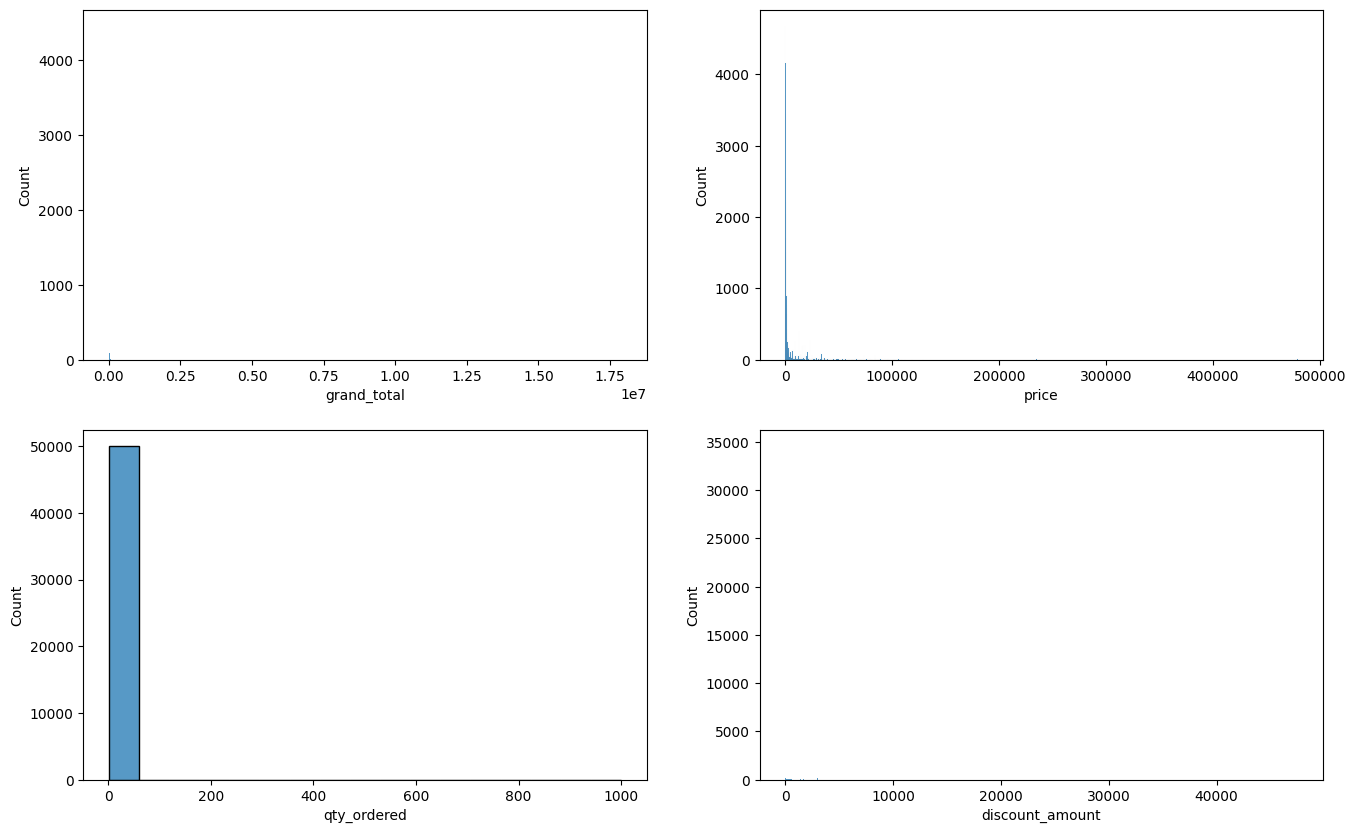

In [68]:
f, ax = plt.subplots(2,2, figsize=(16,10))
sns.histplot(tmp1['grand_total'], ax=ax[0,0])
sns.histplot(tmp1['price'], ax=ax[0,1])
sns.histplot(tmp1['qty_ordered'], ax=ax[1,0])
sns.histplot(tmp1['discount_amount'], ax=ax[1,1])
plt.show()


#### Categorical Data Visualization

In [69]:
tmp = df.select('created_at','status','payment_status','category','payment_method','bi_status').toPandas()

In [86]:
tmp1 = tmp.status.value_counts()#.sort_values(ascending=True)
# tmp1 =pd.DataFrame.from_dict(tmp1)

<Axes: ylabel='status'>

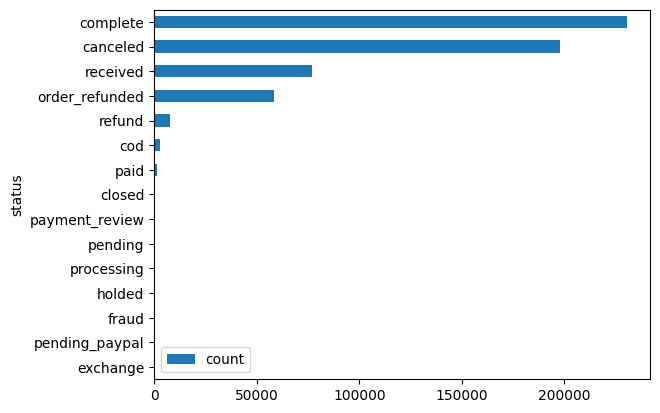

In [80]:
tmp1.plot(kind='barh')

In [87]:
tmp1

status
complete          230451
canceled          197974
received           77150
order_refunded     58343
refund              7876
cod                 2851
paid                1156
closed               492
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
Name: count, dtype: int64

<Axes: ylabel='status'>

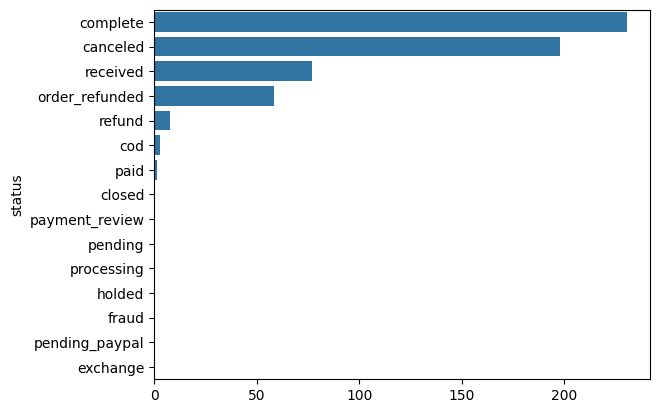

In [95]:
sns.barplot(x=tmp1.values/1000, y=tmp1.index, orient='h')

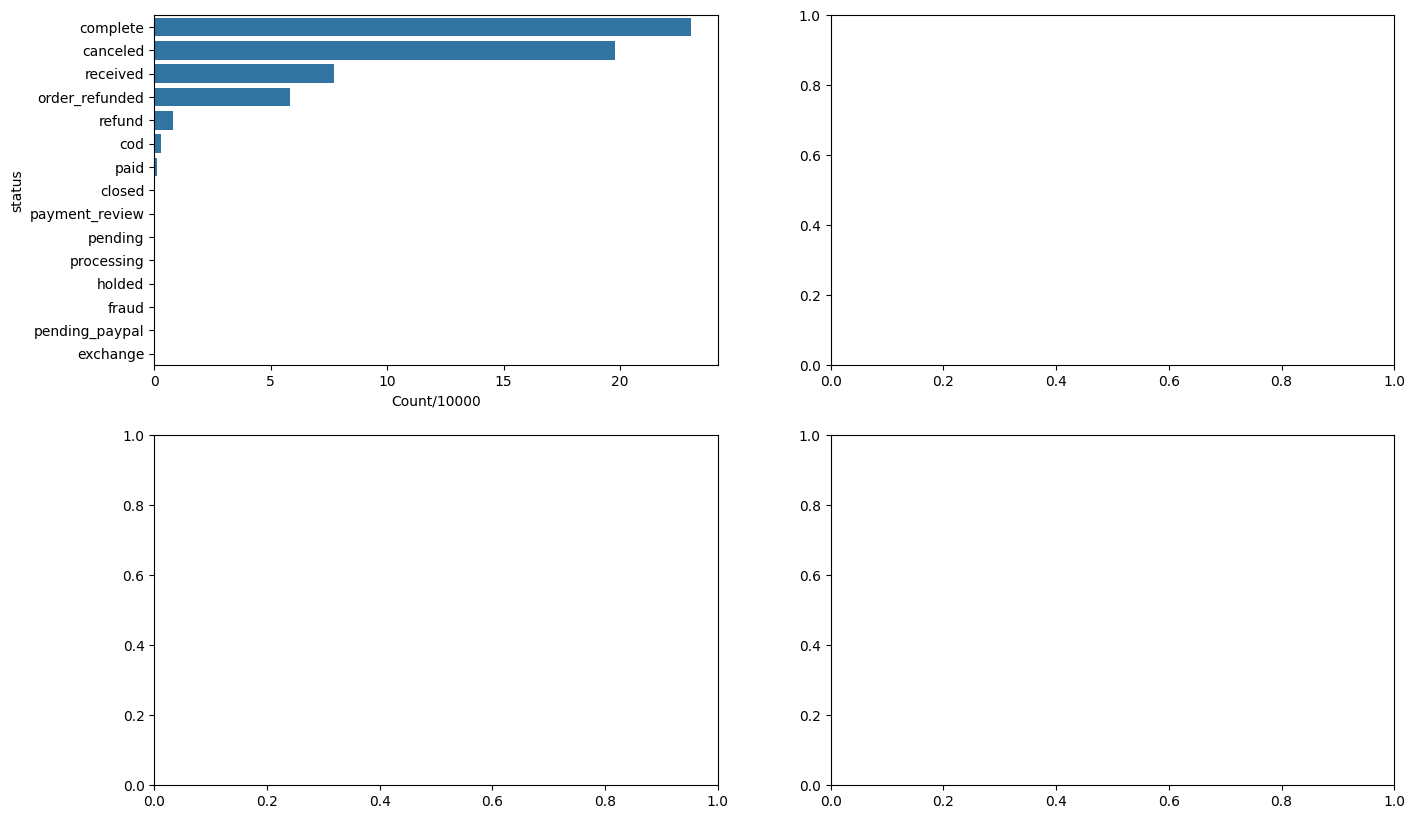

In [97]:
f, ax = plt.subplots(2,2, figsize=(16,10))
ax[0,0] = sns.barplot(x=tmp1.values/10000, y=tmp1.index, orient='h', ax=ax[0,0])
ax[0,0].set_xlabel('Count/10000')
ax[0,0] = sns.barplot(x=tmp1.values/10000, y=tmp1.index, orient='h', ax=ax[0,0])
ax[0,0].set_xlabel('Count/10000')
plt.show()
